# Classification 分类 metrics

## confusion_matrix 混淆矩阵
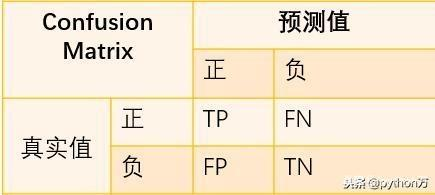

* TP(True Positive)：将正类预测为正类数，真实为0，预测也为0
* FN(False Negative)：将正类预测为负类数，真实为0，预测为1
* FP(False Positive)：将负类预测为正类数， 真实为1，预测为0
* TN(True Negative)：将负类预测为负类数，真实为1，预测也为1

In [22]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

array([[2, 0],
       [1, 2]])

In [29]:
confusion_matrix([0, 1, 1, 0, 1], [0, 1, 0, 0, 1]).ravel()

array([2, 0, 1, 2])

In [30]:
tp, fn, fp, tn = confusion_matrix([0, 1, 1, 0, 1], [0, 1, 0, 0, 1]).ravel()

In [32]:
tp, fn, fp, tn

(2, 1, 0, 2)

In [27]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [28]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

### PlotConfusionMatrix

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def PlotConfusionMatrix(y_test,pred,y_test_legit,y_test_fraud):

    cfn_matrix = confusion_matrix(y_test,pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

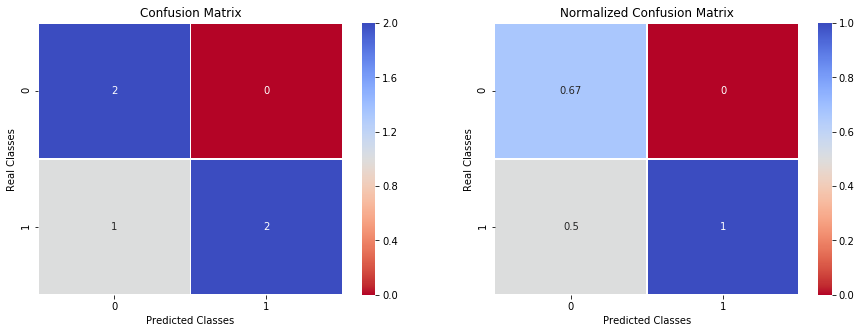

---Classification Report---
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

   micro avg       0.80      0.80      0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [26]:
PlotConfusionMatrix([0, 1, 1, 0, 1], [0, 1, 0, 0, 1], 3, 2)

## accuracy_score

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

0.8

## precision_score
y_pred中预测为1中样本中，实际为1的比例

In [11]:
from sklearn.metrics import precision_score

In [13]:
precision_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

1.0

### precision_n_scores
使用场景：预测值为评分。把预测得分中的前n个置为1，计算precision score

In [14]:
from pyod.utils.utility import precision_n_scores,  get_label_n

In [15]:
y = [0, 1, 1, 0, 1]
y_pred = [0.1, 0.5, 0.3, 0.2, 0.7]

In [16]:
# 把分数高的前n个值置为1， 默认n为y中1的数量
get_label_n(y, y_pred)

array([0, 1, 1, 0, 1])

In [17]:
precision_n_scores(y, y_pred)

1.0

等价于

In [7]:
precision_score(y, get_label_n(y, y_pred))

1.0

In [8]:
precision_score(y, get_label_n(y, y_pred, 2))

1.0

## recall_score

In [18]:
from sklearn.metrics import recall_score

In [19]:
recall_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

0.6666666666666666

## f1_score
F1 = 2 * (precision * recall) / (precision + recall)

In [20]:
from sklearn.metrics import f1_score

In [21]:
f1_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

0.8

### fbeta_score
F1-Score，这时召回率和精确率都很重要，权重相同。当有些情况下我们认为精确率更为重要，那就调整 β 的值小于 1 ，如果我们认为召回率更加重要，那就调整 β的值大于1，比如F2-Score。

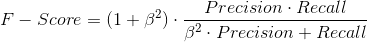

In [22]:
from sklearn.metrics import fbeta_score

In [23]:
fbeta_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1], 1)

0.8

In [24]:
fbeta_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1], 2)

0.7142857142857142

## classification_report

In [1]:
from sklearn.metrics import classification_report

In [4]:
print(classification_report([0, 1, 1, 0, 1], [0, 1, 0, 0, 1]))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

   micro avg       0.80      0.80      0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



## curves
### PR curve(precision_recall_curve)

In [7]:
from sklearn.metrics import precision_recall_curve

In [8]:
precision_recall_curve([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.4, 0.8])

(array([1., 1., 1., 1.]),
 array([1.        , 0.66666667, 0.33333333, 0.        ]),
 array([0.5, 0.7, 0.8]))

### AP average_precision_score
Compute average precision (AP) from prediction scores

AP summarizes a precision-recall curve as the weighted mean of precisions
achieved at each threshold, with the increase in recall from the previous
threshold used as the weight:

In [27]:
from sklearn.metrics import average_precision_score

In [29]:
average_precision_score([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.9, 0.8])

0.6388888888888888

### roc_curve

In [7]:
from sklearn.metrics import roc_curve

In [18]:
roc_curve([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.9, 0.8])

(array([0. , 0.5, 0.5, 1. ]),
 array([0., 0., 1., 1.]),
 array([1.9, 0.9, 0.5, 0.1]))

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
def draw_prc_roc(y_test,pred_prob):
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlim([-0.05,1.05])
    ax1.set_ylim([-0.05,1.05])
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlim([-0.05,1.05])
    ax2.set_ylim([-0.05,1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')

#     for w,k in zip([1,5,10,20,50,100,10000],'bgrcmykw'):
#         lr_model = LogisticRegression(class_weight={0:1,1:w})
#         lr_model.fit(x_train,y_train)
#         pred_prob = lr_model.predict_proba(x_test)[:,1]

#         p,r,_ = precision_recall_curve(y_test,pred_prob)
#         tpr,fpr,_ = roc_curve(y_test,pred_prob)

#         ax1.plot(r,p,c=k,label=w)
#         ax2.plot(tpr,fpr,c=k,label=w)
    p,r,_ = precision_recall_curve(y_test,pred_prob)
    tpr,fpr,_ = roc_curve(y_test,pred_prob)

    ax1.plot(r,p,c='b',label='prc')
    ax2.plot(tpr,fpr,c='b',label='roc')
    ax1.legend(loc='lower left')    
    ax2.legend(loc='lower left')

    plt.show()

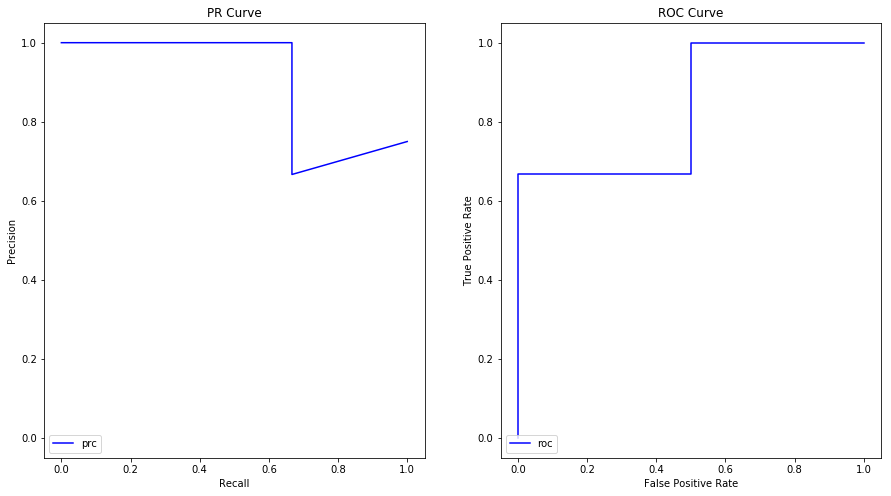

In [30]:
draw_prc_roc([0, 1, 1, 0, 1], [0.1, 0.7, 0.5, 0.6, 0.8])

### roc_auc_score
Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

一般AUC均在0.5到1之间，AUC越高，模型的区分能力越好，上图AUC为0.81。若AUC=0.5，即与上图中红线重合，表示模型的区分能力不随机猜测没有差别。若AUC真的小于0.5，表明模型很差。

In [35]:
from sklearn.metrics import roc_auc_score

In [36]:
roc_auc_score([0, 1, 1, 0, 1], [0, 1, 0, 0, 1])

0.8333333333333333

# 回归 metrics

## mse：mean_squared_error 均方误差

### mse计算

In [10]:
import numpy as np

In [9]:
y_true, y_pred = [3, -0.5, 2, 7], [2.5, 0.0, 2, 8]

In [14]:
np.mean(np.square(np.array(y_true) - np.array(y_pred)))

0.375

In [4]:
from sklearn.metrics import mean_squared_error as mse

In [5]:
y_true, y_pred = [3, -0.5, 2, 7], [2.5, 0.0, 2, 8]
print(mse(y_true, y_pred))

0.375


## R2 决定系数（拟合优度）
决定系数（coefficient ofdetermination），有的教材上翻译为判定系数，也称为拟合优度。  
https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination  
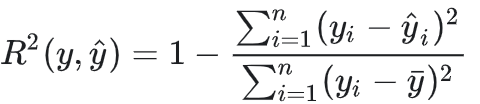

yi代表真实值， y^代表预测值。    

从公式中，可以很容易看出：  
R2是把__预测值和真实值的误差平方和__和__真实值的方差__做比较！

* 模型越好：r2→1
* 模型越差：r2→0
* 一个模型的R2 值为0还不如直接用平均值来预测效果好；而一个R2值为1的模型则可以对目标变量进行完美的预测。
* 从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用特征来解释。
* 模型也可能出现负值的R2，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。

In [41]:
def cal_r2_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_mean = np.mean(y_true)
    return 1 - np.sum(np.square(y_true-y_pred))/np.sum(np.square(y_true-y_mean))

In [42]:
cal_r2_score(y_true, y_pred)

0.9486081370449679

In [1]:
from sklearn.metrics import r2_score

In [2]:
y_true, y_pred = [3, -0.5, 2, 7], [2.5, 0.0, 2, 8]
print(r2_score(y_true, y_pred))

0.9486081370449679


# 信息检索information retrieval中常用的评估指标
http://www.thefullwiki.org/Mean_average_precision

https://blog.csdn.net/weixin_40446557/article/details/83106995